In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('wines.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic_acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity_of_ash               178 non-null float64
Magnesium                       178 non-null int64
Total_phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid_phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color_intensity                 178 non-null float64
Hue                             178 non-null float64
OD280-OD315_of_diluted_wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
y = df['Class']

In [6]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [7]:
y_cat = pd.get_dummies(y)

In [8]:
y_cat.shape

(178, 3)

In [9]:
df.columns

Index(['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280-OD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [10]:
X = df.drop('Class', axis=1)

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
Alcohol                         178 non-null float64
Malic_acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity_of_ash               178 non-null float64
Magnesium                       178 non-null int64
Total_phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid_phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color_intensity                 178 non-null float64
Hue                             178 non-null float64
OD280-OD315_of_diluted_wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [12]:
import seaborn as sns
sns.set()

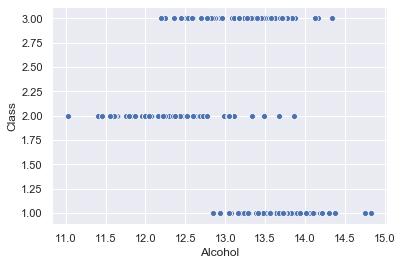

In [13]:
sns.scatterplot(x='Alcohol', y=y, data=df)

In [14]:
from keras.models import Sequential

Using TensorFlow backend.


In [15]:
model = Sequential()

In [16]:
from keras.layers import Dense

In [17]:
model.add(Dense(units=5, input_shape=(13,), activation='relu', kernel_initializer='he_normal' ))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 70        
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.add(Dense(units=8, activation='relu', kernel_initializer='he_normal' ))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 70        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 48        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.add(Dense(units=2, activation='relu', kernel_initializer='he_normal' ))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 70        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.add(Dense(units=3, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 70        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [25]:
from keras.optimizers import RMSprop

In [26]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'] )

In [27]:
model.layers[0].input

<tf.Tensor 'dense_1_input:0' shape=(None, 13) dtype=float32>

In [28]:
model.layers[3].output

<tf.Tensor 'dense_4/Softmax:0' shape=(None, 3) dtype=float32>

In [29]:
model.fit(X,y_cat, epochs=100)

Epoch 1/100
178/178 [==============================] - 0s 1ms/step - loss: 249.7764 - accuracy: 0.3989
Epoch 2/100
178/178 [==============================] - 0s 105us/step - loss: 224.9317 - accuracy: 0.3989
Epoch 3/100
178/178 [==============================] - 0s 84us/step - loss: 208.3077 - accuracy: 0.3989
Epoch 4/100
178/178 [==============================] - 0s 118us/step - loss: 193.1014 - accuracy: 0.3989
Epoch 5/100
178/178 [==============================] - 0s 112us/step - loss: 178.5053 - accuracy: 0.3989
Epoch 6/100
178/178 [==============================] - 0s 88us/step - loss: 164.8966 - accuracy: 0.3989
Epoch 7/100
178/178 [==============================] - 0s 106us/step - loss: 152.2557 - accuracy: 0.3989
Epoch 8/100
178/178 [==============================] - 0s 109us/step - loss: 139.7850 - accuracy: 0.3989
Epoch 9/100
178/178 [==============================] - 0s 95us/step - loss: 128.1570 - accuracy: 0.3989
Epoch 10/100
178/178 [==============================] - 0s 1

178/178 [==============================] - 0s 101us/step - loss: 1.0914 - accuracy: 0.3989
Epoch 80/100
178/178 [==============================] - 0s 106us/step - loss: 1.0911 - accuracy: 0.3989
Epoch 81/100
178/178 [==============================] - 0s 153us/step - loss: 1.0911 - accuracy: 0.3989
Epoch 82/100
178/178 [==============================] - 0s 135us/step - loss: 1.0908 - accuracy: 0.3989
Epoch 83/100
178/178 [==============================] - 0s 112us/step - loss: 1.0907 - accuracy: 0.3989
Epoch 84/100
178/178 [==============================] - 0s 110us/step - loss: 1.0905 - accuracy: 0.3989
Epoch 85/100
178/178 [==============================] - 0s 95us/step - loss: 1.0903 - accuracy: 0.3989
Epoch 86/100
178/178 [==============================] - 0s 106us/step - loss: 1.0901 - accuracy: 0.3989
Epoch 87/100
178/178 [==============================] - 0s 101us/step - loss: 1.0900 - accuracy: 0.3989
Epoch 88/100
178/178 [==============================] - 0s 100us/step - loss: 

In [30]:
import keras.backend as K

In [31]:
#K.clear_session()

In [32]:
#model.get_weights()

In [33]:
loss = pd.DataFrame(model.history.history)

In [34]:
type(loss)

pandas.core.frame.DataFrame

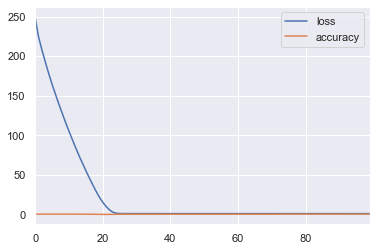

In [35]:
loss.plot()

In [37]:
model.save('wines_model.h5')